This function gets increasingly oscillatory near the right endpoint.

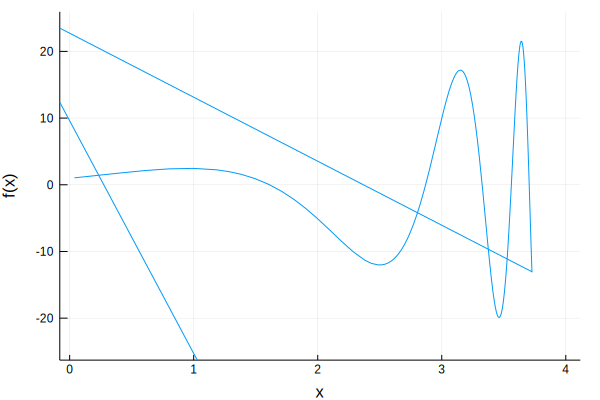

In [1]:
f = x -> (x+1)^2*cos((2*x+1)/(x-4.3))

using Plots
plot(f,0,4,label="",xlabel="x",ylabel="f(x)")

Accordingly, the trapezoid rule is more accurate on the left half of the interval than on the right half.

In [2]:
include("../FNC.jl")
n = @. 50*2^(0:3)
Tleft = []; Tright = [];
for (i,n) = enumerate(n)
    Tleft = [ Tleft; FNC.trapezoid(f,0,2,n)[1] ] 
    Tright = [ Tright; FNC.trapezoid(f,2,4,n)[1] ] 
end

In [3]:
using QuadGK
left_val,err = quadgk(f,0,2,atol=1e-14,rtol=1e-14)
right_val,err = quadgk(f,2,4,atol=1e-14,rtol=1e-14)

using DataFrames
DataFrame(n=n,left_error=Tleft.-left_val,right_error=Tright.-right_val)

,n,left_error,right_error
,Int64,Float64,Float64
1,50,-0.00249106,0.504229
2,100,-0.000622715,0.0960044
3,200,-0.000155675,0.0225473
4,400,-3.89187e-5,0.00555422


Both the picture and the numbers suggest that more nodes should be used on the right half of the interval than on the left half.